Problem Statement: Aim is to build the clusters of customers based on characterstics like age,income,spending score

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
#Read data
df=pd.read_csv('/content/shopping_data.csv')
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
x=df[['Annual Income (k$)','Spending Score (1-100)']].values
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [ ]:
#Find optimal K using Elbow curve
wcss=[] #intertia
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

print(wcss)

[269981.28000000014, 186206.76002258612, 106348.37306211119, 73880.64496247198, 44448.45544793369, 40825.16946386947, 36696.482572574496, 26162.2256474685, 21850.16528258562, 22359.91162509058]


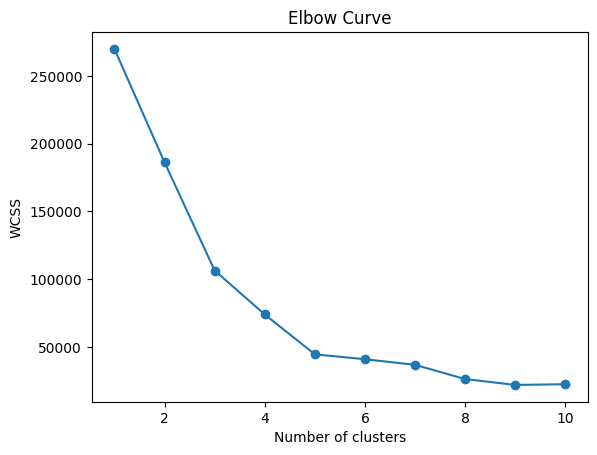

In [ ]:
#Plot Elbow curve
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

K=5

In [ ]:
#Build Kmeans with optimal clusters K=5
kmeans=KMeans(n_clusters=5,init='k-means++')
kmeans.fit(x)

KMeans(n_clusters=5)

In [ ]:
y_pred=kmeans.predict(x)
print(y_pred)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [ ]:
#Silhoutte Score
score=silhouette_score(x,y_pred)
print(score)

0.4641747037792799


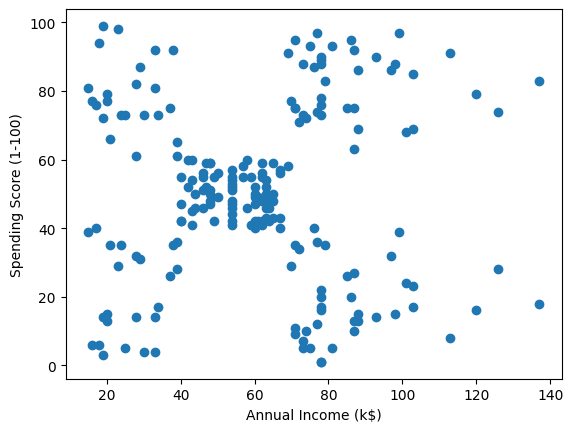

In [ ]:
#Visualize Data (Before Clustering)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

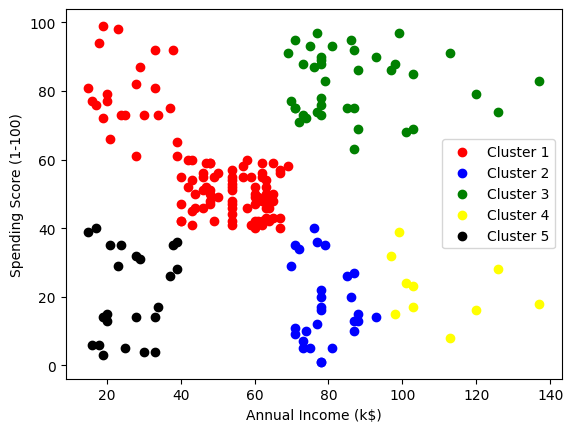

In [ ]:
#Visualize the clusters (After clustering)
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],c='red',label='Cluster 1')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],c='blue',label='Cluster 2')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],c='green',label='Cluster 3')
plt.scatter(x[y_pred==3,0],x[y_pred==3,1],c='yellow',label='Cluster 4')
plt.scatter(x[y_pred==4,0],x[y_pred==4,1],c='black',label='Cluster 5')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

In [ ]:
temp=y_pred.tolist()
for i in range(len(temp)):
  if temp[i]==0:
    temp[i]='Mid Income-Mid Spend'
  elif temp[i]==1:
    temp[i]='High Income,High Spending'
  elif temp[i]==2:
    temp[i]='Low Income,High Spending'
  elif temp[i]==3:
    temp[i]='Mid Income,Low Spending'
  elif temp[i]==4:
    temp[i]='Low Income,Low Spending'

In [ ]:
df['Cluster']=temp
print(df)

     CustomerID   Genre  ...  Spending Score (1-100)                   Cluster
0             1    Male  ...                      39   Low Income,Low Spending
1             2    Male  ...                      81      Mid Income-Mid Spend
2             3  Female  ...                       6   Low Income,Low Spending
3             4  Female  ...                      77      Mid Income-Mid Spend
4             5  Female  ...                      40   Low Income,Low Spending
..          ...     ...  ...                     ...                       ...
195         196  Female  ...                      79  Low Income,High Spending
196         197  Female  ...                      28   Mid Income,Low Spending
197         198    Male  ...                      74  Low Income,High Spending
198         199    Male  ...                      18   Mid Income,Low Spending
199         200    Male  ...                      83  Low Income,High Spending

[200 rows x 6 columns]


# Hierarchical Clustering

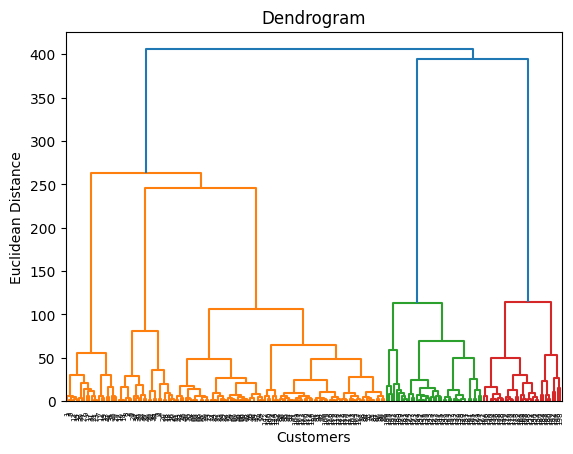

In [ ]:
#Plot Dendrogram
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
#Optimal Clusters K=5

In [ ]:
hc=AgglomerativeClustering(n_clusters=5,linkage='ward')
y_pred=hc.fit_predict(x)
print(y_pred)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [ ]:
#Evaluate clusters
score=silhouette_score(x,y_pred)
print(score)

0.5529945955148897


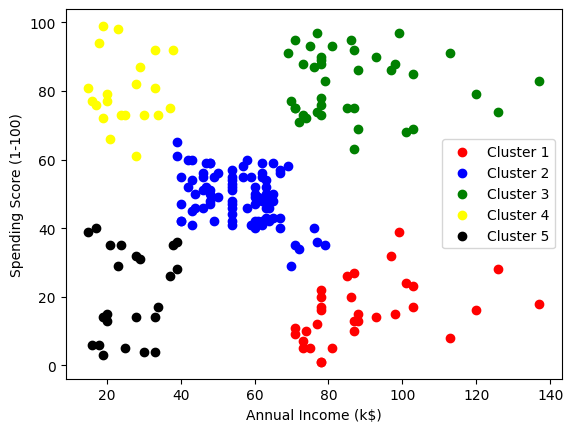

In [ ]:
#Visualize the clusters (After clustering)
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],c='red',label='Cluster 1')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],c='blue',label='Cluster 2')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],c='green',label='Cluster 3')
plt.scatter(x[y_pred==3,0],x[y_pred==3,1],c='yellow',label='Cluster 4')
plt.scatter(x[y_pred==4,0],x[y_pred==4,1],c='black',label='Cluster 5')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()